In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter("ignore")

In [5]:
data = pd.read_csv("Language Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

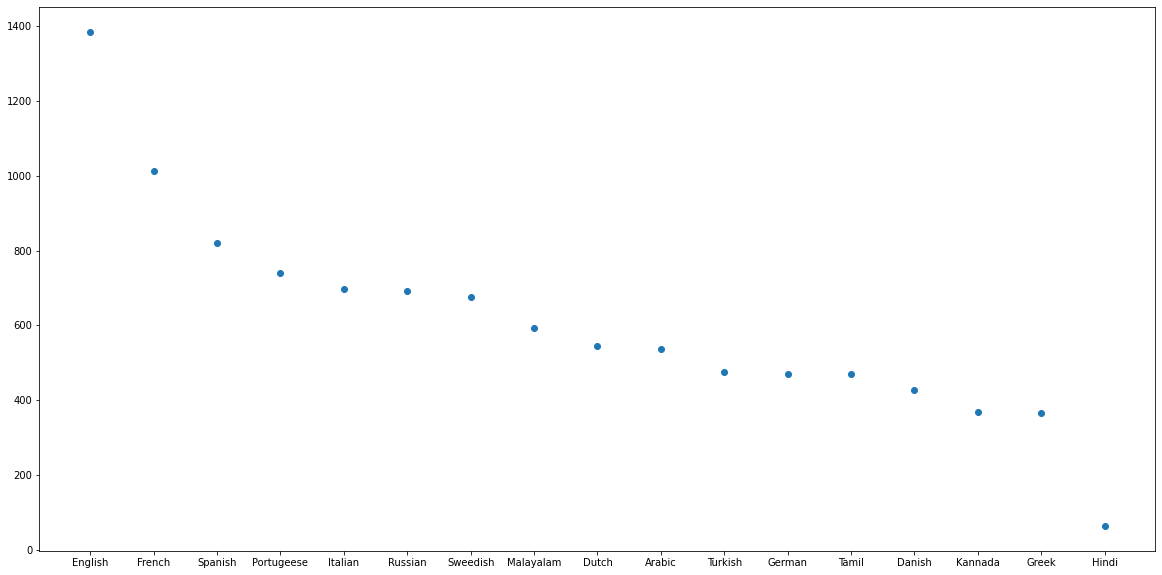

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(data["Language"].value_counts(), "o")

#massive skew in data set towards english and french, Hindi language too less examples

In [24]:
# trying with hindi included in dataset
X = data["Text"]
y = data["Language"]

# label encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
list_data = []
for i in X:
  i = re.sub(r'[0-9]', '', i)
  i = re.sub(r'[",;:.!@#$%^&*()]', '', i)
  i = re.sub(r'[[]]', '' , i)
  i = i.lower()
  list_data.append(i)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(list_data).toarray()
X.shape

(10337, 39440)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [28]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc= accuracy_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)

print(cm)

[[141   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 127   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0 180   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   2   3 451   3   1   1   1   2   6   3   5   6   3   2   0   6]
 [  0   0   1   0 265   0   0   0   0   0   0   0   0   0   0   0   3]
 [  0   1   0   0   0 140   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  99   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   1   0   0   0 207   0   0   1   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0  99   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   1   0   0   0 167   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 210   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 202   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   1   0 250   0   0   0]
 [  0 

In [30]:
print("accuracy: ", acc)

accuracy:  0.9780786589297228


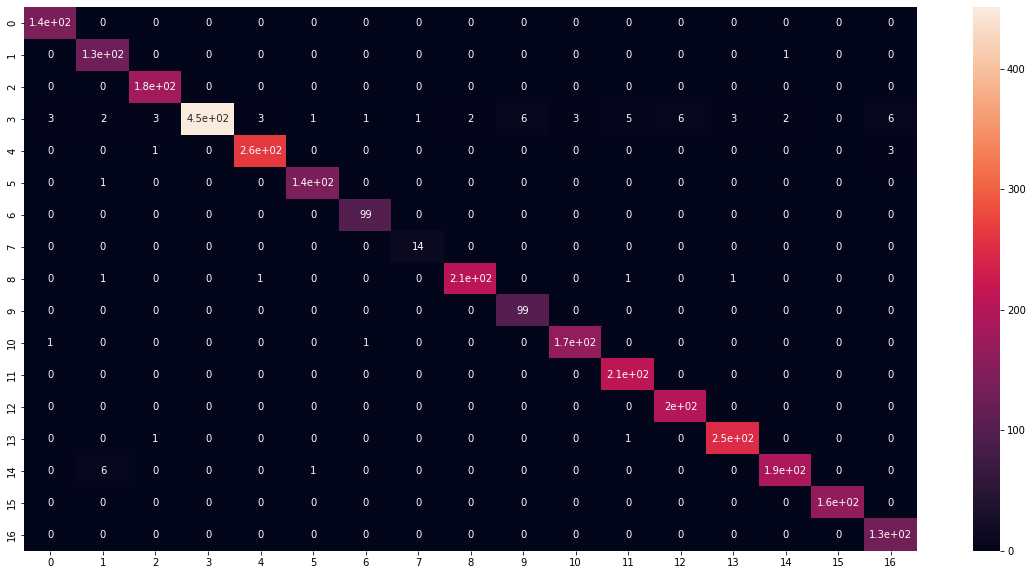

In [31]:
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot =True)
plt.show()


In [32]:
def prediction(text):
  x = cv.transform([text]).toarray()
  lang = model.predict(x)
  lang = le.inverse_transform(lang)
  print("language is", lang[0])

prediction("this is a good day")
prediction("herr goring das is nicht gut")
prediction("Piacere di conoscerti")
prediction("Nosotros somos hermanos")
prediction("je te tiens au courant	")
prediction("	Hur mår du")

language is English
language is German
language is Italian
language is Spanish
language is French
language is Sweedish
